In [3]:
# Data processing
import pandas as pd
# Linear algebra
import numpy as np

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data splitting & parameter tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# ML Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingClassifier

# Feature selection
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

# Evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score

# Further processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [4]:
# Import the dataset
data = pd.read_csv('NEWCS_TEST.csv')

# Show the first 2 lines to verify that we have imported the dataset correctly 
data.head(3)

C:\Users\angel\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,1,2,3,7,8,10,11,12,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,No Submission of Contract,Business Sector,Type of Business,State,Loan Amount,Interest [%],Maturity,Maturity Type,Length of Business Ownership,LBO(Months),Gender,Marital Status,Home Ownership,Length of Stay,Loan Purpose,Another Loan,CS EKF,NEW CS
0,005.0119.0030,PERDAGANGAN,DAGANG,TANGERANG,3360000.0,12.0,40.0,M,5 Tahun,60.0,P,KAWIN,MILIK SENDIRI,20.0,MENAMBAH MODAL USAHA,YES,B,B
1,005.0119.0033,PERDAGANGAN,DAGANG,TANGERANG,5360000.0,12.0,40.0,M,10 Tahun,120.0,P,JANDA/DUDA,MILIK SENDIRI,20.0,MENAMBAH MODAL USAHA,YES,B,B
2,005.0119.0037,PERDAGANGAN,DAGANG,TANGERANG,5360000.0,12.0,40.0,M,7 Tahun,84.0,P,JANDA/DUDA,MILIK SENDIRI,20.0,MENAMBAH MODAL USAHA,NO,B,A-


In [5]:
data.tail(2)

,No Submission of Contract,Business Sector,Type of Business,State,Loan Amount,Interest [%],Maturity,Maturity Type,Length of Business Ownership,LBO(Months),Gender,Marital Status,Home Ownership,Length of Stay,Loan Purpose,Another Loan,CS EKF,NEW CS
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaN,NaN,2.800376e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
No Submission of Contract       7348 non-null object
Business Sector                 7348 non-null object
Type of Business                7348 non-null object
State                           7348 non-null object
Loan Amount                     7349 non-null float64
Interest [%]                    7348 non-null float64
Maturity                        7348 non-null float64
Maturity Type                   7348 non-null object
Length of Business Ownership    7332 non-null object
LBO(Months)                     7332 non-null float64
Gender                          7348 non-null object
Marital Status                  7348 non-null object
Home Ownership                  7348 non-null object
Length of Stay                  7348 non-null float64
Loan Purpose                    7348 non-null object
Another Loan                    7348 non-null object
CS EKF                          73

In [7]:
data.drop(['No Submission of Contract', 'Type of Business', 'Maturity Type',
          'Length of Business Ownership'], axis=1, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
Business Sector    7348 non-null object
State              7348 non-null object
Loan Amount        7349 non-null float64
Interest [%]       7348 non-null float64
Maturity           7348 non-null float64
LBO(Months)        7332 non-null float64
Gender             7348 non-null object
Marital Status     7348 non-null object
Home Ownership     7348 non-null object
Length of Stay     7348 non-null float64
Loan Purpose       7348 non-null object
Another Loan       7348 non-null object
CS EKF             7348 non-null object
NEW CS             7332 non-null object
dtypes: float64(5), object(9)
memory usage: 112.0+ MB


In [9]:
data.isna().sum()

Business Sector    1041227
State              1041227
Loan Amount        1041226
Interest [%]       1041227
Maturity           1041227
LBO(Months)        1041243
Gender             1041227
Marital Status     1041227
Home Ownership     1041227
Length of Stay     1041227
Loan Purpose       1041227
Another Loan       1041227
CS EKF             1041227
NEW CS             1041243
dtype: int64

In [10]:
data = data.dropna()

In [11]:
print('Number of rows in the dataset: ',data.shape[0])
print('Number of columns in the dataset: ',data.shape[1])

Number of rows in the dataset:  7332
Number of columns in the dataset:  14


In [12]:
data.describe()

,Loan Amount,Interest [%],Maturity,LBO(Months),Length of Stay
count,7.332000e+03,7332.000000,7332.000000,7332.000000,7332.000000
mean,3.813471e+06,12.023322,39.442853,74.930033,21.245908
std,6.364286e+05,0.928123,2.842884,80.348448,14.819284
min,2.300000e+06,8.000000,25.000000,1.000000,1.000000
25%,3.360000e+06,12.000000,40.000000,24.000000,9.000000
50%,3.860000e+06,12.000000,40.000000,48.000000,20.000000
75%,4.360000e+06,12.000000,40.000000,96.000000,30.000000
max,6.650000e+06,15.000000,50.000000,876.000000,110.000000


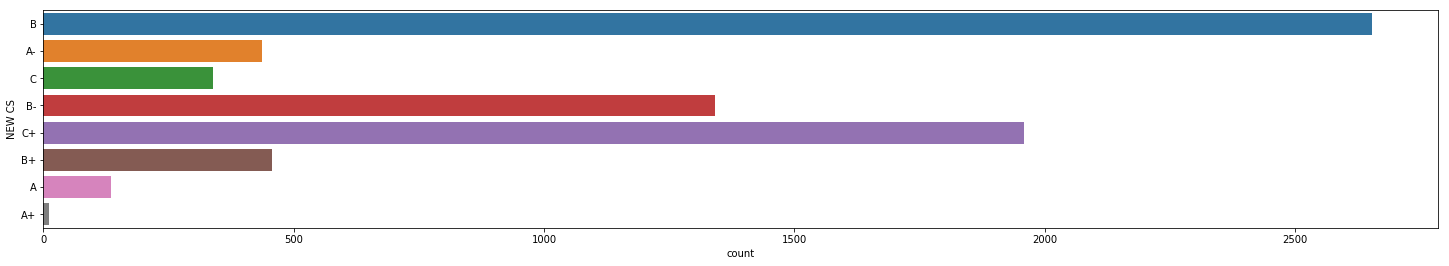

In [13]:
fig = plt.figure(figsize=(25,4))
sns.countplot(y='NEW CS', data=data) 
plt.show()

In [14]:
data['NEW CS'].value_counts()

B     2654
C+    1959
B-    1341
B+     457
A-     436
C      338
A      135
A+      12
Name: NEW CS, dtype: int64

In [15]:
data_num = data.copy()

In [16]:
score_labels = {'A+': 7, 'A': 6, 'A-': 5, 'B+': 4, 'B': 3, 'B-': 2, 'C+': 1, 'C': 0}
data_num['NEW CS'] = data_num['NEW CS'].replace(score_labels).astype(int)

In [17]:
data_num.loc[:, data_num.dtypes == 'object'] = data_num.loc[:, data_num.dtypes == 'object'].apply(lambda x: LabelEncoder().fit_transform(x), axis=0)

In [18]:
data_num['NEW CS'].value_counts()

3    2654
1    1959
2    1341
4     457
5     436
0     338
6     135
7      12
Name: NEW CS, dtype: int64

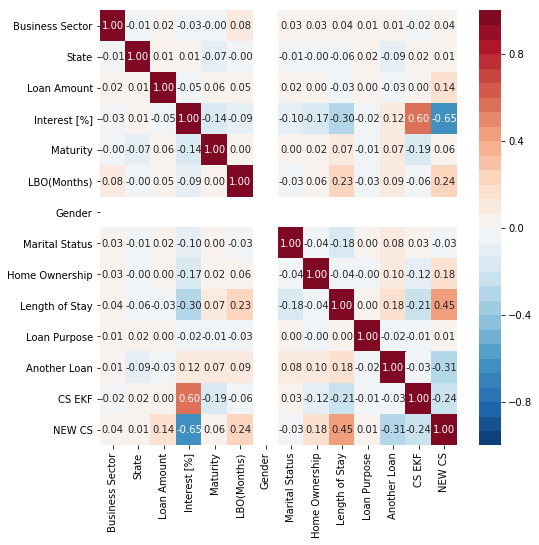

In [19]:
plt.figure(figsize=(8,8))
mycorr = data_num.corr()
sns.heatmap(mycorr, vmin=-1, vmax=1, cmap=sns.color_palette("RdBu_r", 30), annot=True, fmt='.2f')

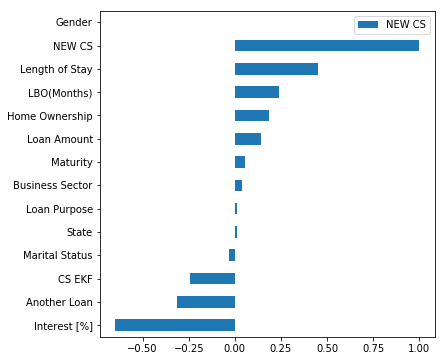

In [20]:
mycorr['NEW CS'].sort_values().to_frame().plot(kind='barh', figsize=(6,6))

#### Machine Learning Algorithms

In [21]:
X = data_num.drop(['NEW CS'], axis=1)
y = data_num['NEW CS']

In [22]:
y.value_counts()

3    2654
1    1959
2    1341
4     457
5     436
0     338
6     135
7      12
Name: NEW CS, dtype: int64

#### KNN

In [23]:
# KNN of a 10-fold cross-validation with k=10 (the n_neighbors hyperparameter)
knn = KNeighborsClassifier(n_neighbors=10)
y_pred = cross_val_predict(knn, X, y, cv=10) #cv is the cross-validation parameter
print(classification_report(y, y_pred))
print("The average is", np.mean(y_pred == y))

              precision    recall  f1-score   support

           0       0.49      0.30      0.37       338
           1       0.48      0.54      0.51      1959
           2       0.43      0.34      0.38      1341
           3       0.56      0.75      0.64      2654
           4       0.33      0.14      0.20       457
           5       0.26      0.05      0.08       436
           6       0.43      0.07      0.13       135
           7       0.00      0.00      0.00        12

   micro avg       0.51      0.51      0.51      7332
   macro avg       0.37      0.27      0.29      7332
weighted avg       0.48      0.51      0.47      7332

The average is 0.5055919258046918


C:\Users\angel\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\angel\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\angel\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
knn_cm = pd.DataFrame(confusion_matrix(y, y_pred), index=score_labels.keys(), columns=score_labels.keys())
knn_cm

,A+,A,A-,B+,B,B-,C+,C
A+,102,181,42,13,0,0,0,0
A,101,1056,358,420,18,4,2,0
A-,3,440,456,399,31,10,2,0
B+,2,436,120,1998,49,41,8,0
B,0,43,36,309,64,4,1,0
B-,0,23,40,328,24,21,0,0
C+,0,12,3,110,0,0,10,0
C,0,3,0,2,7,0,0,0


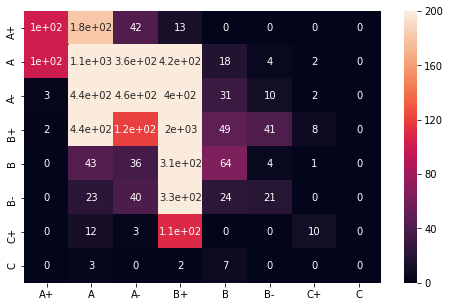

In [25]:
plt.figure(figsize=(8,5))
sns.heatmap(knn_cm, vmax=200, vmin=0, annot=True)

#### Logistic Regression

In [26]:
# Logistic Regression with a 10-fold cross validation
lr_model = LogisticRegression(multi_class='ovr', solver='lbfgs')
lr_predictions = cross_val_predict(lr_model, X, y, cv=10)
print(classification_report(y, lr_predictions))
print("The average is", np.mean(lr_predictions == y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       338
           1       0.45      0.12      0.19      1959
           2       0.00      0.00      0.00      1341
           3       0.37      0.96      0.54      2654
           4       0.00      0.00      0.00       457
           5       0.00      0.00      0.00       436
           6       0.00      0.00      0.00       135
           7       0.00      0.00      0.00        12

   micro avg       0.38      0.38      0.38      7332
   macro avg       0.10      0.13      0.09      7332
weighted avg       0.25      0.38      0.25      7332

The average is 0.37847790507364976


C:\Users\angel\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\angel\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\angel\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
lr_cm = pd.DataFrame(confusion_matrix(y, lr_predictions), index=score_labels.keys(), columns=score_labels.keys())
lr_cm

,A+,A,A-,B+,B,B-,C+,C
A+,0,61,0,277,0,0,0,0
A,0,236,0,1723,0,0,0,0
A-,0,112,0,1229,0,0,0,0
B+,0,115,0,2539,0,0,0,0
B,0,3,0,454,0,0,0,0
B-,0,2,0,434,0,0,0,0
C+,0,1,0,134,0,0,0,0
C,0,0,0,12,0,0,0,0


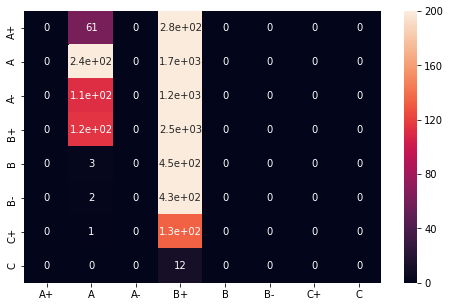

In [28]:
plt.figure(figsize=(8,5))
sns.heatmap(lr_cm, vmax=200, vmin=0, annot=True)

#### Gradient Boosting

In [29]:
gb_model = GradientBoostingClassifier(learning_rate=0.03, n_estimators=75 , max_depth=6)
gb_predictions = cross_val_predict(gb_model, X, y, cv=5)
print(classification_report(y, gb_predictions))
print("The average is", np.mean(gb_predictions == y))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       338
           1       0.99      0.99      0.99      1959
           2       0.99      0.99      0.99      1341
           3       0.99      1.00      0.99      2654
           4       0.99      0.98      0.98       457
           5       0.99      0.99      0.99       436
           6       0.95      0.95      0.95       135
           7       0.90      0.75      0.82        12

   micro avg       0.99      0.99      0.99      7332
   macro avg       0.97      0.95      0.96      7332
weighted avg       0.99      0.99      0.99      7332

The average is 0.9897708674304418


In [30]:
gb_cm = pd.DataFrame(confusion_matrix(y, gb_predictions), index=score_labels.keys(), columns=score_labels.keys())
gb_cm

,A+,A,A-,B+,B,B-,C+,C
A+,324,14,0,0,0,0,0,0
A,3,1943,9,2,2,0,0,0
A-,0,1,1333,6,0,1,0,0
B+,0,2,1,2642,2,1,6,0
B,0,0,0,8,447,1,0,1
B-,0,0,0,5,0,431,0,0
C+,0,0,0,7,0,0,128,0
C,0,0,0,0,2,0,1,9


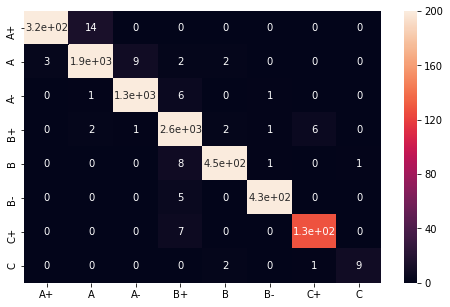

In [31]:
plt.figure(figsize=(8,5))
sns.heatmap(gb_cm, vmax=200, vmin=0, annot=True)

#### SVM

In [32]:
## Support Vector Machine - SVM seems to provide the best recall result but relatively low accuracy (compared to our other models)
svc_model = SVC(gamma="auto")
svc_predictions = cross_val_predict(svc_model, X, y, cv=5)
print(classification_report(y, svc_predictions))
print("The average is", np.mean(svc_predictions == y))

              precision    recall  f1-score   support

           0       0.55      0.16      0.25       338
           1       0.51      0.41      0.46      1959
           2       0.46      0.24      0.31      1341
           3       0.47      0.86      0.61      2654
           4       0.12      0.01      0.02       457
           5       0.67      0.07      0.13       436
           6       0.44      0.03      0.06       135
           7       0.00      0.00      0.00        12

   micro avg       0.48      0.48      0.48      7332
   macro avg       0.40      0.22      0.23      7332
weighted avg       0.47      0.48      0.42      7332

The average is 0.4769503546099291


C:\Users\angel\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\angel\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\angel\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
svc_cm = pd.DataFrame(confusion_matrix(y, svc_predictions), index=score_labels.keys(), columns=score_labels.keys())
svc_cm

,A+,A,A-,B+,B,B-,C+,C
A+,55,160,19,104,0,0,0,0
A,45,805,256,852,1,0,0,0
A-,0,329,320,682,10,0,0,0
B+,0,254,78,2277,27,13,5,0
B,0,12,10,428,5,2,0,0
B-,0,12,11,382,0,31,0,0
C+,0,2,1,128,0,0,4,0
C,0,0,0,12,0,0,0,0


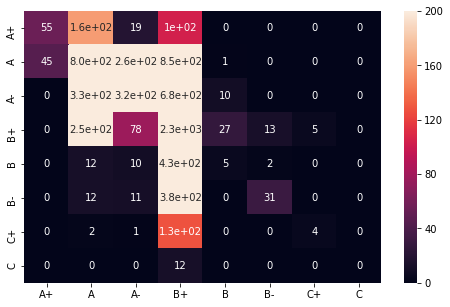

In [34]:
plt.figure(figsize=(8,5))
sns.heatmap(svc_cm, vmax=200, vmin=0, annot=True)

#### Random Forest

In [35]:
## Random Forest with Cross Validation instead of 80-20 train-test split
rf_model = RandomForestClassifier(n_estimators=100)
rf_predictions = cross_val_predict(rf_model, X, y, cv=6)
print(classification_report(y, rf_predictions))
print("The average is", np.mean(rf_predictions == y))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95       338
           1       0.99      0.99      0.99      1959
           2       0.99      0.99      0.99      1341
           3       0.99      1.00      0.99      2654
           4       0.98      0.98      0.98       457
           5       0.98      1.00      0.99       436
           6       1.00      1.00      1.00       135
           7       0.91      0.83      0.87        12

   micro avg       0.99      0.99      0.99      7332
   macro avg       0.98      0.96      0.97      7332
weighted avg       0.99      0.99      0.99      7332

The average is 0.9882705946535734


In [36]:
rf_cm = pd.DataFrame(confusion_matrix(y, rf_predictions), index=score_labels.keys(), columns=score_labels.keys())
rf_cm

,A+,A,A-,B+,B,B-,C+,C
A+,309,29,0,0,0,0,0,0
A,6,1932,10,9,2,0,0,0
A-,0,0,1333,6,2,0,0,0
B+,0,0,1,2646,3,4,0,0
B,0,0,0,5,447,4,0,1
B-,0,0,0,0,2,434,0,0
C+,0,0,0,0,0,0,135,0
C,0,0,0,0,1,1,0,10


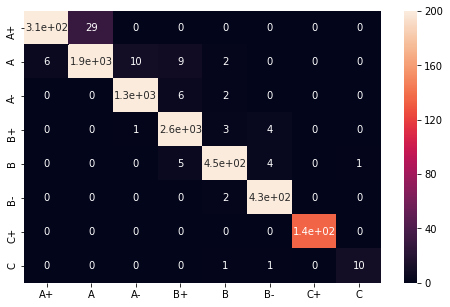

In [37]:
plt.figure(figsize=(8,5))
sns.heatmap(rf_cm, vmax=200, vmin=0, annot=True)

#### Naive Bayes

In [38]:
## Naive Bayes with Cross Validation of 10-folds
nbcv_model = GaussianNB()
nbcv_predictions = cross_val_predict(nbcv_model, X, y, cv=6)
print(classification_report(y, nbcv_predictions))
print("The average is", np.mean(nbcv_predictions == y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       338
           1       0.37      0.77      0.50      1959
           2       0.00      0.00      0.00      1341
           3       0.50      0.56      0.53      2654
           4       0.25      0.10      0.14       457
           5       0.11      0.01      0.02       436
           6       0.20      0.14      0.16       135
           7       0.12      0.17      0.14        12

   micro avg       0.42      0.42      0.42      7332
   macro avg       0.19      0.22      0.19      7332
weighted avg       0.31      0.42      0.34      7332

The average is 0.417075831969449


C:\Users\angel\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\angel\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\angel\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [39]:
nb_cm = pd.DataFrame(confusion_matrix(y, nbcv_predictions), index=score_labels.keys(), columns=score_labels.keys())
nb_cm

,A+,A,A-,B+,B,B-,C+,C
A+,0,313,0,22,2,1,0,0
A,0,1502,0,404,39,4,7,3
A-,0,839,0,465,24,10,2,1
B+,0,1018,0,1484,53,30,65,4
B,0,115,0,287,45,4,3,3
B-,0,192,0,221,13,6,0,4
C+,0,33,0,83,0,0,19,0
C,0,0,0,5,5,0,0,2


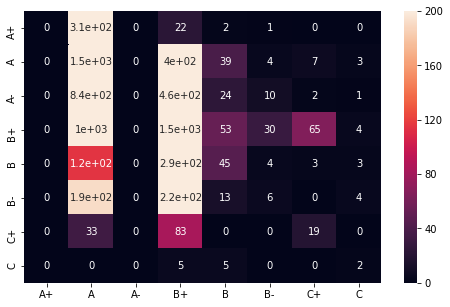

In [40]:
plt.figure(figsize=(8,5))
sns.heatmap(nb_cm, vmax=200, vmin=0, annot=True)